In [1]:
import torchvision
import torch.nn as nn
import torch
import torch.nn.functional as F
from torchvision import transforms,models,datasets
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from torch import optim
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import cv2, glob, numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
!pip install torchsummary
import os
!pip install -U -q torch_snippets
from torch_snippets import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.2/204.2 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 46.9 MB/s eta 0:

In [2]:
#get access a Google Drive file from Colab by
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# make copy from file or directory.
# Navigate to the directory where the file you want to copy is located.
# You can use the %cd command to change to the directory
%cd /content/drive/MyDrive/ML_project/'full dataset'


/content/drive/MyDrive/ML_project/full dataset


In [4]:
#use !cp command to make a copy of the file.
%cp /content/drive/MyDrive/ML_project/'full dataset' -r /content/ML-project


^C


In [ ]:
import gdown
import shutil
from datetime import datetime

# Define the Google Drive file ID
file_id = '/content/drive/MyDrive/ML_project/full dataset'

# Define the URL to download the file from Google Drive
url = 'https://drive.google.com/uc?id=' + file_id

# Define the destination directory
destination = '/content/ML-project/full_dataset'

# Record the start time
start_time = datetime.now()

# Download the file using gdown
gdown.download(url, destination, quiet=False)

# If you need to move the file to another location, you can use shutil.move
# For example, to move it to /content/ML-project directory
shutil.move(destination, '/content/ML-project')

# Record the end time
end_time = datetime.now()

# Calculate the time taken
time_taken = end_time - start_time

print("File downloaded and moved successfully.")
print("Time taken:", time_taken)


In [5]:
%cd /content/ML-project/

/content/ML-project


In [ ]:
%ls

Streaming output truncated to the last 5000 lines.
03586.jpg  12452.jpg  21332.jpg  30234.jpg  39129.jpg  48023.jpg  56896.jpg  65766.jpg  74681.jpg
03587.jpg  12453.jpg  21333.jpg  30235.jpg  39130.jpg  48024.jpg  56897.jpg  65767.jpg  74682.jpg
03588.jpg  12454.jpg  21334.jpg  30236.jpg  39132.jpg  48025.jpg  56898.jpg  65768.jpg  74683.jpg
03589.jpg  12455.jpg  21335.jpg  30239.jpg  39133.jpg  48026.jpg  56899.jpg  65769.jpg  74684.jpg
03590.jpg  12456.jpg  21336.jpg  30240.jpg  39135.jpg  48027.jpg  56900.jpg  65770.jpg  74685.jpg
03591.jpg  12457.jpg  21337.jpg  30241.jpg  39137.jpg  48028.jpg  56901.jpg  65771.jpg  74686.jpg
03592.jpg  12458.jpg  21338.jpg  30243.jpg  39138.jpg  48029.jpg  56902.jpg  65772.jpg  74687.jpg
03593.jpg  12459.jpg  21339.jpg  30244.jpg  39139.jpg  48030.jpg  56903.jpg  65773.jpg  74688.jpg
03594.jpg  12460.jpg  21340.jpg  30246.jpg  39140.jpg  48031.jpg  56904.jpg  65774.jpg  74689.jpg
03595.jpg  12461.jpg  21341.jpg  30247.jpg  39141.jpg  48032.jpg  5

In [6]:
!unzip -qq Cover.zip -d /content/ML-project/Cover/

In [7]:
!unzip -qq JMiPOD.zip -d /content/ML-project/jmipod/

In [9]:
cover_final_path= '/content/ML-project/Cover/'
jmipod_final_path='/content/ML-project/jmipod/'
#juniward_final_path ='Ml_project/JUNIWARD.zip/'
#uerd_final_path = 'Ml_project/UERD.zip/'
#test_final_path = 'Ml_project/Test.zip/'

In [10]:
def get_files():
  import os
  # Define a list of directories containing images
  image_dirs = [
    {"path": cover_final_path, "label": "Cover"},
    {"path": jmipod_final_path, "label": "JMiPOD"},
    # Add more directories as needed, with their corresponding labels
  ]

  # Specify the number of images you want to access from each folder
  num_images_per_folder = 500  # Change this number to the desired value

  # Dictionary to store selected files from each folder
  selected_files = {}

  # Function to label images in a directory
  def label_images(directory, label):
    files = os.listdir(directory)
    labeled_files = [(os.path.join(directory, file), label) for file in files if file.endswith(".jpg")]
    return labeled_files

  # Loop through each directory
  for image_dir_info in image_dirs:
    image_dir = image_dir_info["path"]
    label = image_dir_info["label"]

    # Label images in the directory
    labeled_files = label_images(image_dir, label)

    # Slice the list to get the specified number of images
    selected_files[image_dir] = labeled_files[:num_images_per_folder]

  file_path = []
  label = []
  # Print the selected files for verification
  for i in range(num_images_per_folder):
    for image_dir, files in selected_files.items():
        file_path.append(files[i][0])

  return file_path

In [ ]:
#file_path = []
#for i in range(num_images_per_folder):
#    for image_dir, files in selected_files.items():
#        file_path.append(files[i][0])

#print(file_path)


[
    '/content/ML-project/Cover/57231.jpg',
    '/content/ML-project/jmipod/57231.jpg',
    '/content/ML-project/Cover/02579.jpg',
    '/content/ML-project/jmipod/02579.jpg',
    '/content/ML-project/Cover/22348.jpg',
    '/content/ML-project/jmipod/22348.jpg',
    '/content/ML-project/Cover/50234.jpg',
    '/content/ML-project/jmipod/50234.jpg',
    '/content/ML-project/Cover/58899.jpg',
    '/content/ML-project/jmipod/58899.jpg',
    '/content/ML-project/Cover/78226.jpg',
    '/content/ML-project/jmipod/78226.jpg',
    '/content/ML-project/Cover/32834.jpg',
    '/content/ML-project/jmipod/32834.jpg',
    '/content/ML-project/Cover/57947.jpg',
    '/content/ML-project/jmipod/57947.jpg',
    '/content/ML-project/Cover/42666.jpg',
    '/content/ML-project/jmipod/42666.jpg',
    '/content/ML-project/Cover/62643.jpg',
    '/content/ML-project/jmipod/62643.jpg',
    '/content/ML-project/Cover/03911.jpg',
    '/content/ML-project/jmipod/03911.jpg',
    '/content/ML-project/Cover/36587.jpg',
    '/content/ML-project/jmipod/36587.jpg',
    '/content/ML-project/Cover/78077.jpg',
    '/content/ML-project/jmipod/78077.jpg',
    '/content/ML-project/Cover/04550.jpg',
    '/content/ML-project/jmipod/04550.jpg',
    '/content/ML-project/Cover/01299.jpg',
    '/content/ML-project/jmipod/01299.jpg',
    '/content/ML-project/Cover/37292.jpg',
    '/content/ML-project/jmipod/37292.jpg',
    '/content/ML-project/Cover/53877.jpg',
    '/content/ML-project/jmipod/53877.jpg',
    '/content/ML-project/Cover/71174.jpg',
    '/content/ML-project/jmipod/71174.jpg',
    '/content/ML-project/Cover/09177.jpg',
    '/content/ML-project/jmipod/09177.jpg',
    '/content/ML-project/Cover/46977.jpg',
    '/content/ML-project/jmipod/46977.jpg',
    '/content/ML-project/Cover/11122.jpg',
    '/content/ML-project/jmipod/11122.jpg',
    '/content/ML-project/Cover/19025.jpg',
    '/content/ML-project/jmipod/19025.jpg',
    '/content/ML-project/Cover/31891.jpg',
    '/content/ML-project/jmipod/31891.jpg',
    '/content/ML-project/Cover/60133.jpg',
    '/content/ML-project/jmipod/60133.jpg',
    '/content/ML-project/Cover/37517.jpg',
    '/content/ML-project/jmipod/37517.jpg',
    '/content/ML-project/Cover/32870.jpg',
    '/content/ML-project/jmipod/32870.jpg',
    '/content/ML-project/Cover/61575.jpg',
    '/content/ML-project/jmipod/61575.jpg',
    '/content/ML-project/Cover/41924.jpg',
    '/content/ML-project/jmipod/41924.jpg',
    '/content/ML-project/Cover/71069.jpg',
    '/content/ML-project/jmipod/71069.jpg',
    '/content/ML-project/Cover/34690.jpg',
    '/content/ML-project/jmipod/34690.jpg',
    '/content/ML-project/Cover/02985.jpg',
    '/content/ML-project/jmipod/02985.jpg',
    '/content/ML-project/Cover/77033.jpg',
    '/content/ML-project/jmipod/77033.jpg',
    '/content/ML-project/Cover/18644.jpg',
    '/content/ML-project/jmipod/18644.jpg',
    '/content/ML-project/Cover/31693.jpg',
    '/content/ML-project/jmipod/31693.jpg',
    '/content/ML-project/Cover/16974.jpg',
    '/content/ML-project/jmipod/16974.jpg',
    '/content/ML-project/Cover/20840.jpg',
    '/content/ML-project/jmipod/20840.jpg',
    '/content/ML-project/Cover/41414.jpg',
    '/content/ML-project/jmipod/41414.jpg',
    '/content/ML-project/Cover/62990.jpg',
    '/content/ML-project/jmipod/62990.jpg',
    '/content/ML-project/Cover/68614.jpg',
    '/content/ML-project/jmipod/68614.jpg',
    '/content/ML-project/Cover/50861.jpg',
    '/content/ML-project/jmipod/50861.jpg',
    '/content/ML-project/Cover/35615.jpg',
    '/content/ML-project/jmipod/35615.jpg',
    '/content/ML-project/Cover/26865.jpg',
    '/content/ML-project/jmipod/26865.jpg',
    '/content/ML-project/Cover/21156.jpg',
    '/content/ML-project/jmipod/21156.jpg',
    '/content/ML-project/Cover/16506.jpg',
    '/content/ML-project/jmipod/16506.jpg',
    '/content/ML-project/Cover/27137.jpg',
    '/content/ML-project/jmipod/27137.jpg',
    '/content/ML-project/Cover/77792.jpg',
    '/content/ML-project/jmipod/77792.jp

In [ ]:
id2int = {'Cover': 0, 'jmipod': 1}

In [ ]:
images ='/content/ML-project'

In [ ]:
## Transforming DATA
trn_tfms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(512),
    #transforms.RandomHorizontalFlip(p = 0.5),
    #transforms.RandomVerticalFlip(p = 0.5),
    #transforms.RandomRotation(45),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
])

val_tfms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(512),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])

In [ ]:
class stega(Dataset):
  def __init__(self, files, transform=None):
    self.files = files
    self.transform = transform
    logger.info(len(self))

  def __len__(self):
    return len(self.files)

  def __getitem__(self, ix):
    fpath = self.files[ix]
    clss = fname(parent(fpath)) # class of image
    img = read(fpath, 1)
    return img, clss

  def choose(self):
    return self[randint(len(self))] # choose random image

  def collate_fn(self, batch):
    _imgs, classes = list(zip(*batch))
    if self.transform:
      imgs = [self.transform(img)[None] for img in _imgs]
      classes = [torch.tensor([id2int[clss]]) for clss in classes]
      imgs, classes = [torch.cat(i).to(device) for i in [imgs, classes]]
      #print(classes)
      return imgs, classes, _imgs

In [ ]:
images

'/content/ML-project'

In [ ]:
#device = 'cuda' if torch.cuda.is_available() else 'cpu'
#files = glob(images + '/*/*.jpg')

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
files = get_files()

np.random.seed(5)
#np.random.shuffle(files)

test_ratio = 0.2
num_test = int(len(files) * test_ratio)
val_files = files[:num_test]
trn_files = files[num_test:]


# create train and test datasets
trn_ds = stega(trn_files, transform=trn_tfms)
val_ds = stega(val_files, transform=val_tfms)
trn_dl = DataLoader(trn_ds, 32, shuffle=False, collate_fn=trn_ds.collate_fn)
val_dl = DataLoader(val_ds, 32, shuffle=False, collate_fn=val_ds.collate_fn)

[04/09/24 03:36:40] INFO     800                                                                                                  ]8;id=416430;file://<ipython-input-64-248557c6b0c7>:5\<ipython-input-64-248557c6b0c7>]8;;\:]8;id=467315;file://<ipython-input-64-248557c6b0c7>:5#__init__:5\__init__:5]8;;\

                    INFO     200                                                                                                  ]8;id=121486;file://<ipython-input-64-248557c6b0c7>:5\<ipython-input-64-248557c6b0c7>]8;;\:]8;id=232467;file://<ipython-input-64-248557c6b0c7>:5#__init__:5\__init__:5]8;;\

<bound method stega.collate_fn of <__main__.stega object at 0x7d2ea505ff70>>

In [ ]:
files =get_files()
files

'/content/ML-project/jmipod/00272.jpg'

In [ ]:
#device = 'cuda' if torch.cuda.is_available() else 'cpu'
#files = glob(images + '/*/*.jpg')

#np.random.seed(5)
#np.random.shuffle(files)

#test_ratio = 0.2
#num_test = int(len(files) * test_ratio)
#val_files = files[:num_test]
#trn_files = files[num_test:]


# create train and test datasets
#trn_ds = stega(trn_files, transform=trn_tfms)
#val_ds = stega(val_files, transform=val_tfms)
#trn_dl = DataLoader(trn_ds, 100, shuffle=True, collate_fn=trn_ds.collate_fn)
#val_dl = DataLoader(val_ds, 100, shuffle=False, collate_fn=val_ds.collate_fn)

In [ ]:
files

['/content/ML-project/jmipod/57231.jpg',
 '/content/ML-project/jmipod/02579.jpg',
 '/content/ML-project/jmipod/22348.jpg',
 '/content/ML-project/jmipod/50234.jpg',
 '/content/ML-project/jmipod/58899.jpg',
 '/content/ML-project/jmipod/78226.jpg',
 '/content/ML-project/jmipod/32834.jpg',
 '/content/ML-project/jmipod/57947.jpg',
 '/content/ML-project/jmipod/42666.jpg',
 '/content/ML-project/jmipod/62643.jpg',
 '/content/ML-project/jmipod/03911.jpg',
 '/content/ML-project/jmipod/36587.jpg',
 '/content/ML-project/jmipod/78077.jpg',
 '/content/ML-project/jmipod/04550.jpg',
 '/content/ML-project/jmipod/01299.jpg',
 '/content/ML-project/jmipod/37292.jpg',
 '/content/ML-project/jmipod/53877.jpg',
 '/content/ML-project/jmipod/71174.jpg',
 '/content/ML-project/jmipod/09177.jpg',
 '/content/ML-project/jmipod/46977.jpg',
 '/content/ML-project/jmipod/11122.jpg',
 '/content/ML-project/jmipod/19025.jpg',
 '/content/ML-project/jmipod/31891.jpg',
 '/content/ML-project/jmipod/60133.jpg',
 '/content/ML-pr

In [ ]:
if 'cover' not in files:
    print("Element not found.")
else:
    print("Element found!")

Element not found.

In [ ]:
# load the pre-trained ResNet18 model

model = models.resnet18(pretrained=True).to(device)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# Freezing the pre-trained layers using params, and modify the fully connected layers (classification layers)
# replace avgpool with adaptive to ensure the model can handle any inputs from the previous layers
# Define loss function and optimizer

def get_model():
    model = models.resnet18(pretrained=True)
    for param in model.parameters():
        param.requires_grad = False
    model.avgpool = nn.AdaptiveAvgPool2d(output_size=(1,1))
    model.fc = nn.Sequential(nn.Flatten(),
    nn.Linear(512, 128),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(128, 2))
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr= 1e-3)
    return model.to(device), loss_fn, optimizer

In [ ]:
!pip install torch_summary
from torchsummary import summary
model, loss_fn_resnet, optimizer = get_model()
summary(model, torch.zeros(1,3,512,512)) # edit the image size acc to your model

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 256, 256]        (9,408)
├─BatchNorm2d: 1-2                       [-1, 64, 256, 256]        (128)
├─ReLU: 1-3                              [-1, 64, 256, 256]        --
├─MaxPool2d: 1-4                         [-1, 64, 128, 128]        --
├─Sequential: 1-5                        [-1, 64, 128, 128]        --
|    └─BasicBlock: 2-1                   [-1, 64, 128, 128]        --
|    |    └─Conv2d: 3-1                  [-1, 64, 128, 128]        (36,864)
|    |    └─BatchNorm2d: 3-2             [-1, 64, 128, 128]        (128)
|    |    └─ReLU: 3-3                    [-1, 64, 128, 128]        --
|    |    └─Conv2d: 3-4                  [-1, 64, 128, 128]        (36,864)
|    |    └─BatchNorm2d: 3-5             [-1, 64, 128, 128]        (128)
|    |    └─ReLU: 3-6                    [-1, 64, 128, 128]        --
|    └─BasicBlock: 2-2                   [-1, 64, 128, 128]

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 256, 256]        (9,408)
├─BatchNorm2d: 1-2                       [-1, 64, 256, 256]        (128)
├─ReLU: 1-3                              [-1, 64, 256, 256]        --
├─MaxPool2d: 1-4                         [-1, 64, 128, 128]        --
├─Sequential: 1-5                        [-1, 64, 128, 128]        --
|    └─BasicBlock: 2-1                   [-1, 64, 128, 128]        --
|    |    └─Conv2d: 3-1                  [-1, 64, 128, 128]        (36,864)
|    |    └─BatchNorm2d: 3-2             [-1, 64, 128, 128]        (128)
|    |    └─ReLU: 3-3                    [-1, 64, 128, 128]        --
|    |    └─Conv2d: 3-4                  [-1, 64, 128, 128]        (36,864)
|    |    └─BatchNorm2d: 3-5             [-1, 64, 128, 128]        (128)
|    |    └─ReLU: 3-6                    [-1, 64, 128, 128]        --
|    └─BasicBlock: 2-2                   [-1, 64, 128, 128]

In [ ]:
def train_batch(model, data, optimizer, loss_fn):
  model.train()
  ims, labels, _ = data
  _preds = model(ims)
  optimizer.zero_grad()
  loss = loss_fn(_preds, labels)
  acc =(torch.max(_preds, 1)[1]==labels).float().mean()
  loss.backward()
  optimizer.step()
  return loss.item(), acc.item()

@torch.no_grad()
def validate_batch(model, data, loss_fn):
  model.eval()
  ims, labels, _ = data
  _preds = model(ims)
  loss = loss_fn(_preds, labels)
  acc =(torch.max(_preds, 1)[1]==labels).float().mean()
  predictedclass = torch.max(_preds, 1)[1]
  return loss.item(), acc.item(), predictedclass ,labels




# create train and test datasets
#trn_ds_resnet = Cancer_resnet(train_data_dir, transform= train_transformer_resnet)
#val_ds_resnet = Cancer_resnet(test_data_dir, transform= val_transformer_resnet)
#trn_dl_resnet = DataLoader(trn_ds_resnet, 32, shuffle=True, collate_fn=trn_ds_resnet.collate_fn, drop_last=True)
#val_dl_resnet = DataLoader(val_ds_resnet, 32, shuffle=False, collate_fn=val_ds_resnet.collate_fn, drop_last=True)

model, loss_fn1, optimizer = get_model()


EPOCH: 1.000  val_loss: 0.695  val_acc: 0.500  (640.62s - 2562.49s remaining)

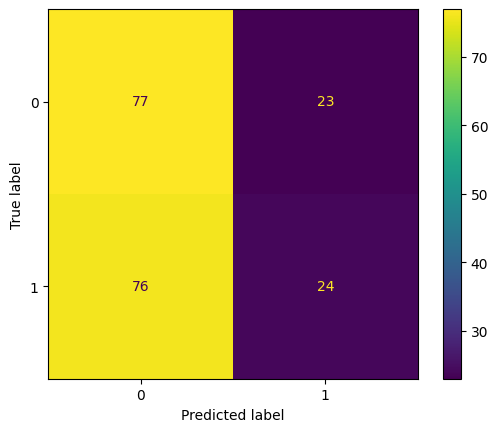

EPOCH: 1.000  trn_acc: 0.488  val_acc: 0.505  trn_loss: 0.711  val_loss: 0.694  (641.00s - 2564.00s remaining)
EPOCH: 2.000  val_loss: 0.694  val_acc: 0.500  (1271.98s - 1907.97s remaining)

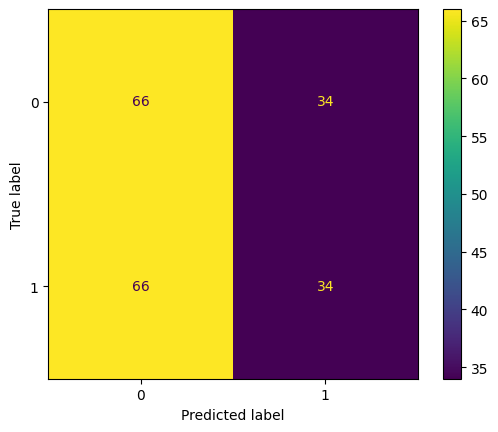

EPOCH: 2.000  trn_acc: 0.485  val_acc: 0.500  trn_loss: 0.696  val_loss: 0.694  (1272.21s - 1908.31s remaining)
EPOCH: 3.000  val_loss: 0.694  val_acc: 0.500  (1911.69s - 1274.46s remaining)

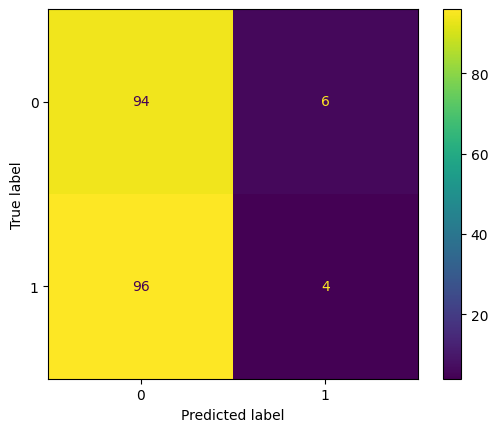

EPOCH: 3.000  trn_acc: 0.495  val_acc: 0.491  trn_loss: 0.698  val_loss: 0.694  (1911.91s - 1274.61s remaining)
EPOCH: 4.000  val_loss: 0.693  val_acc: 0.500  (2547.50s - 636.88s remaining)

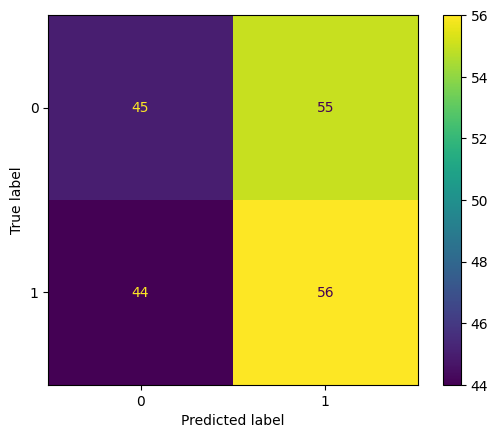

EPOCH: 4.000  trn_acc: 0.505  val_acc: 0.504  trn_loss: 0.693  val_loss: 0.693  (2547.73s - 636.93s remaining)
EPOCH: 5.000  val_loss: 0.693  val_acc: 0.500  (3181.61s - 0.00s remaining)

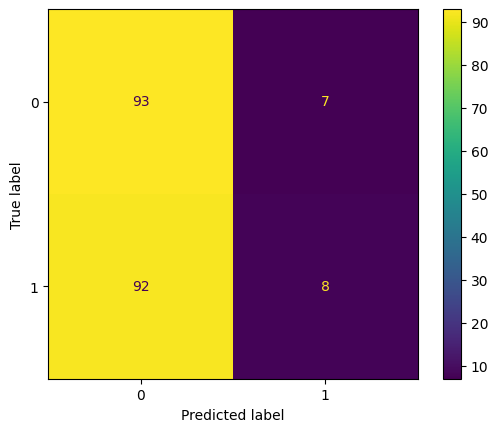

EPOCH: 5.000  trn_acc: 0.507  val_acc: 0.504  trn_loss: 0.693  val_loss: 0.693  (3181.86s - 0.00s remaining)


In [ ]:

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,ConfusionMatrixDisplay
import numpy
import matplotlib.pyplot as plt

n_epochs = 5
classes=['Cover','jmipod']
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
# log functionality from torch_snippets
log = Report(n_epochs)
for ex in range(n_epochs):
  N = len(trn_dl)
  train_epoch_losses, train_epoch_accuracies = [], []
  val_epoch_losses, val_epoch_accuracies = [], []
  prediction, originals =[],[]
  for bx, data in enumerate(trn_dl):
    loss, acc = train_batch(model, data, optimizer, loss_fn1)
    log.record(ex+(bx+1)/N, trn_loss=loss, trn_acc=acc, end='\r')
    train_epoch_losses.append(loss)
    train_epoch_accuracies.append(acc)
  train_epoch_loss = np.array(train_epoch_losses).mean()
  train_epoch_accuracy = np.mean(train_epoch_accuracies)

  N = len(val_dl)
  for bx, data in enumerate(val_dl):
    valloss, valacc, preds, original = validate_batch(model, data, loss_fn1)
    val_epoch_losses.append(valloss)
    val_epoch_accuracies.append(valacc)
    preds=preds.to('cpu').detach().numpy().tolist()
    original=original.to('cpu').detach().numpy().tolist()
    #preds=int(preds[0])
    #original=int(original[0])
    prediction.append(preds)
    originals.append(original)
    log.record(ex+(bx+1)/N, val_loss=valloss, val_acc=valacc, end='\r')
  val_epoch_loss =  np.array(val_epoch_losses).mean()
  val_epoch_accuracy =  np.mean(val_epoch_accuracies)
  list_prediction = [item for sublist in prediction for item in sublist]
  list_originals = [item for sublist in originals for item in sublist]

  cm = confusion_matrix(list_originals, list_prediction)
  dsp = ConfusionMatrixDisplay(confusion_matrix=cm)
  dsp.plot()
  plt.show()


  log.report_avgs(ex+1)
  train_losses.append(train_epoch_loss)
  train_accuracies.append(train_epoch_accuracy)
  val_losses.append(val_epoch_loss)
  val_accuracies.append(val_epoch_accuracy)

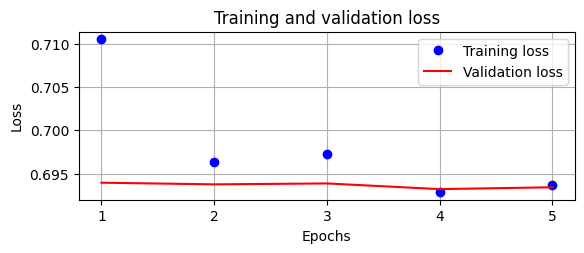

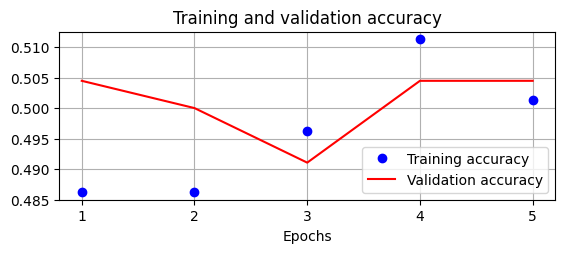

In [ ]:
# plotting

epochs = np.arange(5)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.grid('off')
plt.show()

In [ ]:
# Save model
torch.save(model.state_dict(), 'stego_resnet18.pth')

In [ ]:
# load model
# LOAD SAVED MODEL
model = model.to(device)

model.to(device)

state_dict = torch.load('stego_resnet18.pth')

# Update the model state
model.load_state_dict(state_dict)
model


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  